In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get a summary of the dataset
print(df.info())

df


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


There are no missing values

In [39]:
df.shape

(7043, 21)

In [40]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning 

Create a copy of base data for manupulation & processing

In [42]:
df_copy=df.copy()

In [44]:
#totalcharges column has object data type that i change to numeric 
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [45]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [46]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column after changing dtatatye. Let's check these records

In [47]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [48]:
#missing percentage of telecom column 
(df['TotalCharges'].isnull().sum()/7043)*100


0.1561834445548772

In [49]:
numerical_columns=df[['tenure','MonthlyCharges','TotalCharges']]
numerical_columns


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [50]:
import pandas as pd
import numpy as np


# Step 1: Identify the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Step 2: Handle non-numeric values by converting them to NaN and then to appropriate numeric types
for col in numerical_columns.columns:
    numerical_columns[col] = pd.to_numeric(numerical_columns[col], errors='coerce')

# Step 3: Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the first column of the correlation matrix
print(correlation_matrix.iloc[:, 0])


SeniorCitizen     1.000000
tenure            0.016567
MonthlyCharges    0.220173
TotalCharges      0.102411
Name: SeniorCitizen, dtype: float64


# use kmn imputer to fill the missing values

In [51]:
from sklearn.impute import KNNImputer


In [52]:
# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)


In [53]:

# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Select the columns to impute
columns_to_impute = ['TotalCharges']

# Fit and transform the data to impute missing values
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify that there are no more missing values in TotalChrg
print(df['TotalCharges'].isna().sum())


0


### check if correlation is ok after filling missing data

In [54]:
import pandas as pd
import numpy as np


# Step 1: Identify the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Step 2: Handle non-numeric values by converting them to NaN and then to appropriate numeric types
for col in numerical_columns.columns:
    numerical_columns[col] = pd.to_numeric(numerical_columns[col], errors='coerce')

# Step 3: Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the first column of the correlation matrix
print(correlation_matrix.iloc[:, 0])

SeniorCitizen     1.000000
tenure            0.016567
MonthlyCharges    0.220173
TotalCharges      0.102395
Name: SeniorCitizen, dtype: float64


### Finding resaon behind churn

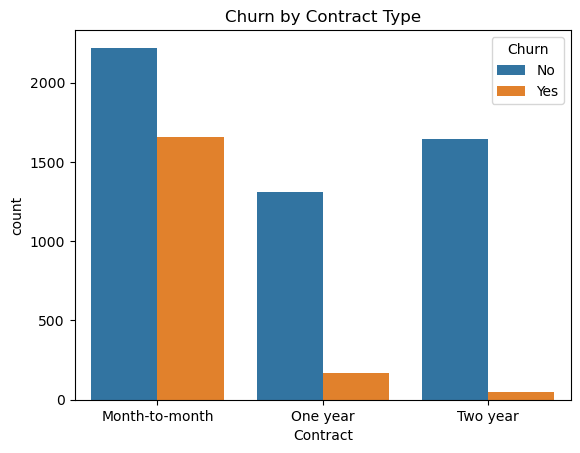

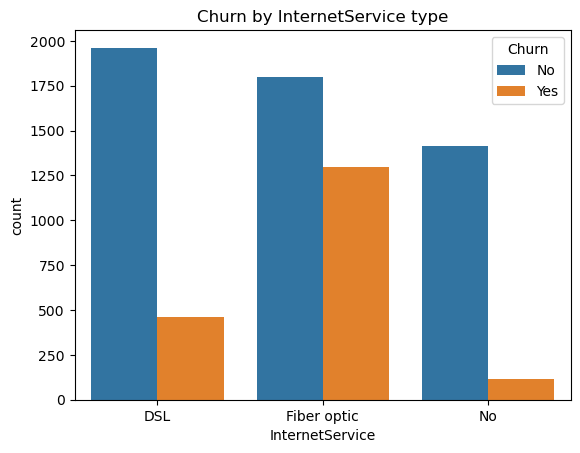

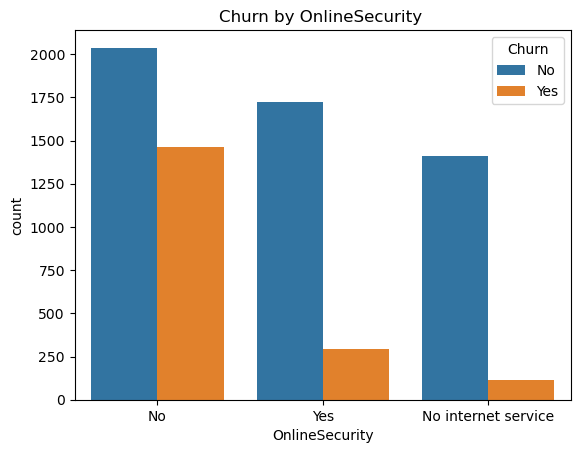

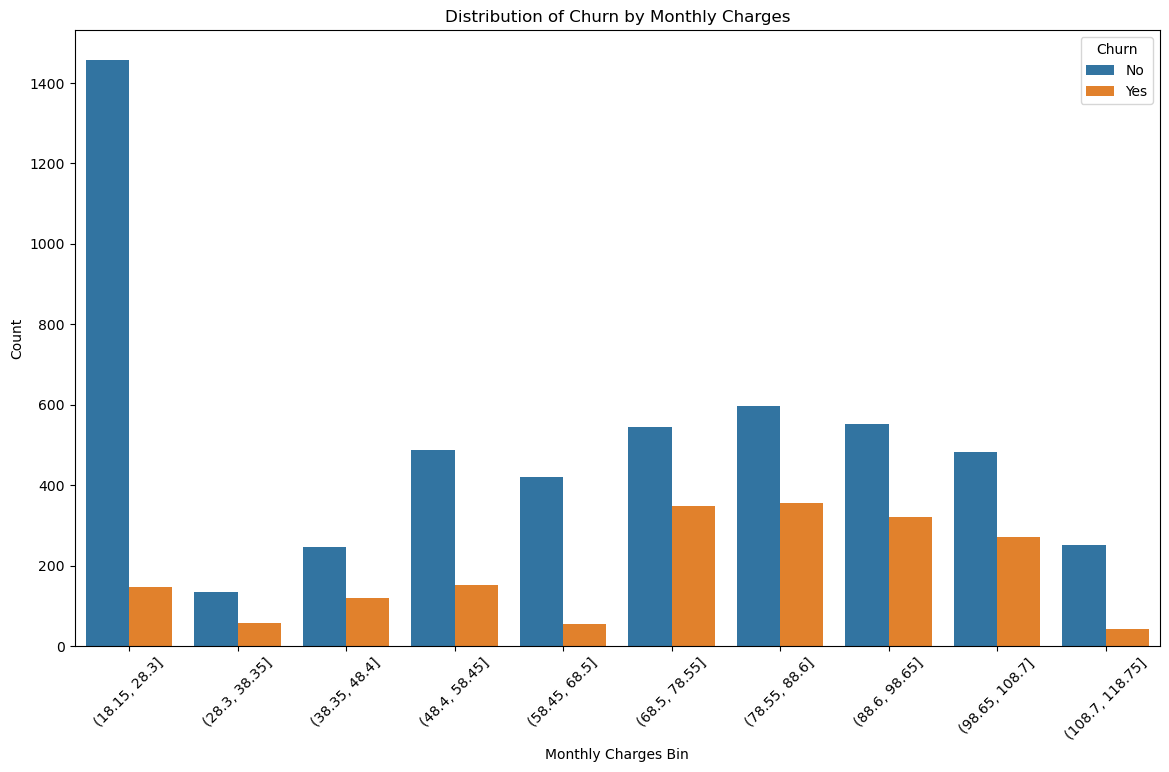

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution by contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by InternetService type')
plt.show()

sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by OnlineSecurity ')
plt.show()

df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=10)

# Plot the data
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='MonthlyCharges_bin', hue='Churn')
plt.title('Distribution of Churn by Monthly Charges')
plt.xlabel('Monthly Charges Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()






# To check whether Monthly price is reason for churn or not

In [57]:
import pandas as pd

# Create the new column 'PriceCategory'
df['Monthly PriceCategory'] = pd.cut(df['MonthlyCharges'],
                             bins=[0, 60, 120],
                             labels=['Low Priced',  'High Priced'],
                             right=False)

# Display the DataFrame
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [58]:
# If the column name is different, replace 'Churn' with the actual column name.

# Group by 'PriceCategory' and calculate churn percentage
churn_percentage = df.groupby('Monthly PriceCategory')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

print(churn_percentage)


Monthly PriceCategory
Low Priced     16.821465
High Priced    33.365571
Name: Churn, dtype: float64


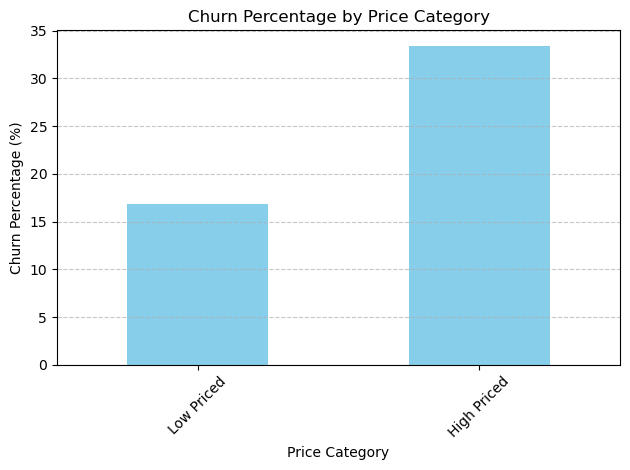

In [61]:
import matplotlib.pyplot as plt


# Group by 'PriceCategory' and calculate churn percentage
churn_percentage = df.groupby('Monthly PriceCategory')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

# Plotting
churn_percentage.plot(kind='bar', color='skyblue')
plt.title('Churn Percentage by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Churn Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## It seems that monthly price is the reason for churn

## Hypothesis test to see if i am correct

In [62]:
# Filter the DataFrame to get rows where churn is 'Yes' and extract MonthlyCharges
monthly_charges_churn_yes = df[df['Churn'] == 'Yes']
yes= monthly_charges_churn_yes['MonthlyCharges']

monthly_charges_churn_yes = df[df['Churn'] == 'No']
No= monthly_charges_churn_yes['MonthlyCharges']

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

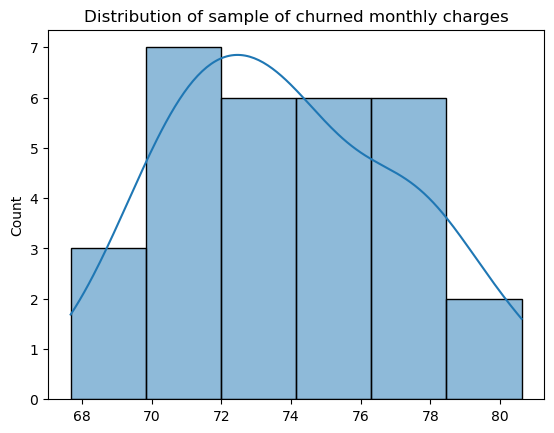

In [65]:
#choosing 30 samples for testing
import numpy as np
import seaborn as sns
samples=[]
for i in range(30):
    samples.append(yes.sample(62).values.tolist())
    
    
samples=np.array(samples)
sampling_mean_yes=samples.mean(axis=1)



sns.histplot(sampling_mean_yes, kde=True)
plt.title('Distribution of sample of churned monthly charges')
plt.show()


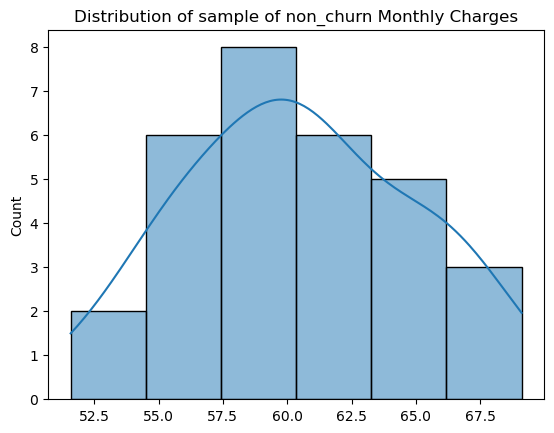

In [66]:
import numpy as np
import seaborn as sns
samples=[]
for i in range(30):
    samples.append(No.sample(62).values.tolist())
    
    
samples=np.array(samples)
sampling_mean_no=samples.mean(axis=1)


sns.histplot(sampling_mean_no, kde=True)
plt.title('Distribution of sample of non_churn Monthly Charges')
plt.show()

In [67]:
sample_mean_of_churned = sampling_mean_yes.mean()
sample_mean_of_churned


73.83989247311825

In [68]:
sample_mean_of_nonchurned = sampling_mean_no.mean()
sample_mean_of_nonchurned

60.47370967741935

In [69]:
std_dev_of_churned=np.std(sampling_mean_yes)
std_dev_of_churned


3.23564392938432

In [70]:
std_dev_of_nonchurned=np.std(sampling_mean_no)
std_dev_of_nonchurned

4.386826518597055

In [72]:
#Null Hypothesis (H0): There is a significant difference in the average monthly charges between customers who have churned and those who have not churned.
#Alternative Hypothesis (H1): There is no significant difference in the average monthly charges between customers who have churned and those who have not churned.
from scipy.stats import t
t_value=13.1
f= 58
cdf_value=t.cdf(t_value,f)
print(cdf_value*2)

2.0


In [ ]:
#p value is 2.0  which is greater than 0.05 so we cannot reject the null hypothesis that There is a significant difference in the average monthly charges between customers who have churned and those who have not churned.

## Finding Risky customer

In [73]:
import pandas as pd

# First, create the 'risk level' column based on the 'Churn' column
df['risk level'] = df['Churn'].apply(lambda x: 'risky' if x == 'Yes' else 'not risky')

# Define the thresholds for high, medium, and low risk levels for risky customers
# You may need to adjust these thresholds based on your specific needs
high_risk_threshold = 80
low_risk_threshold = 40

# Apply the risk levels for 'risky' customers based on MonthlyCharges
def determine_risk_level(row):
    if row['risk level'] == 'risky':
        if row['MonthlyCharges'] >= high_risk_threshold:
            return 'high risky'
        elif row['MonthlyCharges'] <= low_risk_threshold:
            return 'low risky'
        else:
            return 'risky'
    else:
        return row['risk level']

df['risk level'] = df.apply(determine_risk_level, axis=1)

df.head(40)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_bin,Monthly PriceCategory,risk level
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(28.3, 38.35]",Low Priced,not risky
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,"(48.4, 58.45]",Low Priced,not risky
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(48.4, 58.45]",Low Priced,risky
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(38.35, 48.4]",Low Priced,not risky
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(68.5, 78.55]",High Priced,risky
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,"(98.65, 108.7]",High Priced,high risky
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,"(88.6, 98.65]",High Priced,not risky
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,Month-to-month,No,Mailed check,29.75,301.90,No,"(28.3, 38.35]",Low Priced,not risky
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,"(98.65, 108.7]",High Priced,high risky
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,"(48.4, 58.45]",Low Priced,not risky


In [74]:
df.to_csv('telecom churn analysis data',index= False)